In [1]:
# =============================================================================
# Perguntas Iniciais para a Análise de Dados
# =============================================================================
# 1. Qual é o problema de negócio ou objetivo principal deste projeto?
#    - O que estamos tentando resolver ou prever?

#    - Prever se um passageiro da Spaceship Titanic foi "transportado" (ou seja, desapareceu misteriosamente após a anomalia).
#    - O objetivo é construir um modelo preditivo preciso com base em características dos passageiros.


# 2. Quais são as hipóteses iniciais sobre os dados?
#    - Quais relações e padrões esperamos encontrar?

#    - Passageiros em sono criogênico ("CryoSleep") tendem a ter sido transportados com maior frequência.
#    - Gasto total pode estar relacionado ao transporte: passageiros com gastos muito baixos podem estar em CryoSleep.
#    - A localização da cabine (deck e lado) pode ter influência no transporte, devido à possível exposição à anomalia.


# 3. Quais variáveis são essenciais para o problema?
#    - Quais atributos podem influenciar o resultado ou a decisão final?

#    - 'CryoSleep', 'VIP', 'Deck', 'Side', 'Age', 'Destination', e a nova variável derivada de gastos ('Full_Expensives').
#    - Variáveis booleanas relacionadas a comportamento (gastos, sono, status VIP) são fortes candidatas.


# 4. Há problemas de qualidade nos dados?
#    - Existem valores ausentes, outliers ou erros que necessitam tratamento?

#    - Sim. Há valores ausentes em diversas colunas, principalmente nas variáveis de gastos e booleanas.
#    - Foi necessário imputar ou transformar variáveis para lidar com esses dados ausentes.


# 5. Que tipos de relações podem ser exploradas?
#    - Como as variáveis interagem entre si? Qual a correlação entre características e o alvo?

#    - Relações entre gastos e transporte, sono criogênico e transporte, além da posição da cabine (deck/side).
#    - Correlações numéricas com a variável alvo (Transported) ajudam a priorizar atributos no modelo.


# 6. Quais transformações ou engenharia de atributos podem potencializar a análise?
#    - Há maneiras de combinar ou derivar novas informações dos dados brutos?

#    - Criação da variável 'Full_Expensives' somando todos os gastos do passageiro.
#    - Separação e codificação de cabines em 'Deck', 'Num', 'Side'.
#    - Transformação de variáveis categóricas para dummies, tratamento de valores nulos com medianas ou mais frequentes.


# 7. Como e onde a análise será comunicada?
#    - Qual será o formato do produto final (relatório, modelo preditivo, dashboard)?

#    - A entrega do projeto se dará via submissão de um modelo no site da competição.
#    - Resultados também podem ser apresentados em notebook Jupyter com gráficos, explicações e documentação clara.


# =============================================================================

In [2]:
# =============================================================================
# Passo 1: Importar Bibliotecas Necessárias
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBClassifier
import warnings
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")


# Configuração dos gráficos
sns.set(style="whitegrid")

In [3]:
# =============================================================================
# Passo 2: Carregar os Dados
# =============================================================================
def Carrega_dados (caminho):
    try:
        df = pd.read_csv(caminho)
        return df

    except Exception as e:
        print(f"Erro ao ler o arquivo: {e}")
        return None


df_train = Carrega_dados("C:/Users/marcos/Documents/Projetos_Github/Projetos_Kaggle/Nave_Espacial_Titanic/pythonProject/train.csv")
df_train.head(50)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
# =============================================================================
# Passo 3: Entender a Estrutura dos Dados
# =============================================================================
if df_train is not None:
    print("\n--- Estrutura do DataFrame: Tipos de dados e valores não-nulos ---")
    print(df_train.info())

    print("\n--- Estatísticas Descritivas: Estatísticas de variáveis numéricas e categóricas ---")
    print(df_train.describe(include="all"))


--- Estrutura do DataFrame: Tipos de dados e valores não-nulos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None

--- Estatísticas Descritivas: Estatísticas de variáveis numéricas e 


--- Valores Ausentes ---
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64


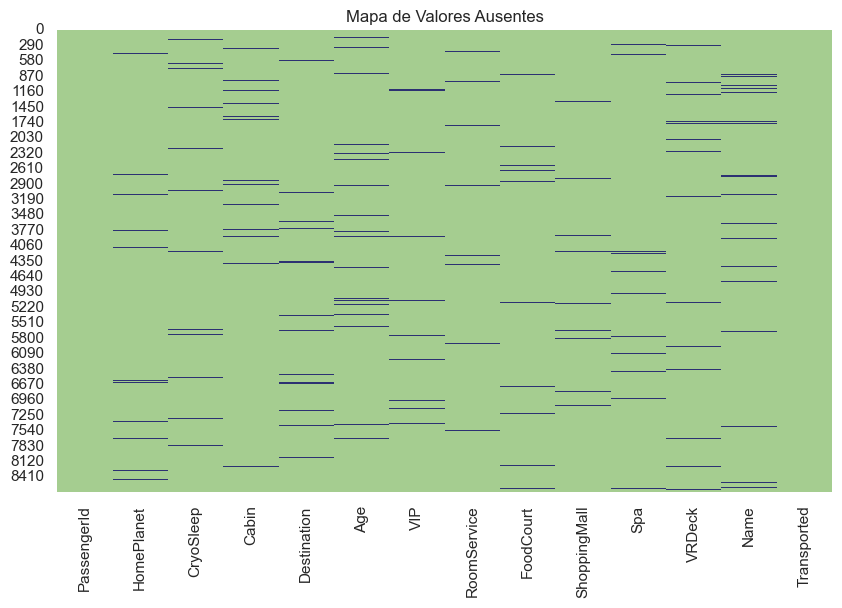

In [5]:
# =============================================================================
# Passo 4: Análise de Valores Ausentes
# =============================================================================
if df_train is not None:
    print("\n--- Valores Ausentes ---")
    missing_counts = df_train.isnull().sum()
    print(missing_counts[missing_counts > 0])

    # Visualizar os dados faltantes com um heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_train.isnull(), cbar = False, cmap="crest")
    plt.title("Mapa de Valores Ausentes")
    plt.show()


In [6]:
# =============================================================================
# Passo 5: Análise dos Dados Categóricos
# =============================================================================
if df_train is not None:
    print("\n--- Análise dos Dados Categóricos ---")
    categorical_cols = df_train.select_dtypes(include=['object', 'category', 'bool']).columns
    for col in categorical_cols:
        print(f"\nColuna: {col}")
        print("Valores únicos:", df_train[col].unique())
        print("Contagem de valores:")
        print(df_train[col].value_counts())

        # Plot para visualizar a distribuição dos dados categóricos
        #plt.figure(figsize=(10, 4))
        #sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index)
        #plt.title(f"Distribuição da Coluna: {col}")
        #plt.xticks(rotation=45)
        #plt.show()


--- Análise dos Dados Categóricos ---

Coluna: PassengerId
Valores únicos: ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
Contagem de valores:
0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: PassengerId, Length: 8693, dtype: int64

Coluna: HomePlanet
Valores únicos: ['Europa' 'Earth' 'Mars' nan]
Contagem de valores:
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

Coluna: CryoSleep
Valores únicos: [False True nan]
Contagem de valores:
False    5439
True     3037
Name: CryoSleep, dtype: int64

Coluna: Cabin
Valores únicos: ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Contagem de valores:
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

Coluna: Destination
Valores únicos: ['TRAPPIS

In [7]:
# =============================================================================
# Observação Estratégica
# =============================================================================
# Pode haver uma correlação entre o status "Transported" e a localização dos passageiros na nave (deck e lado).
# Diferentes regiões podem ter sido afetadas de forma desigual pela anomalia cósmica.
# Essa análise pode contribuir significativamente para o desempenho do modelo preditivo.


In [8]:
# =============================================================================
# Passo 6: Análise Univariada de Variáveis Numéricas
# =============================================================================
#if df_train is not None:
#    print("\n--- Análise Univariada de Variáveis Numéricas ---")
#    numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
#    for col in numeric_cols:
#        plt.figure(figsize=(10, 4))
#        sns.histplot(df_train[col].dropna(), kde=True, bins=30)
#        plt.title(f"Distribuição da Coluna: {col}")
#        plt.xlabel(col)
#        plt.ylabel("Frequência")
#        plt.show()

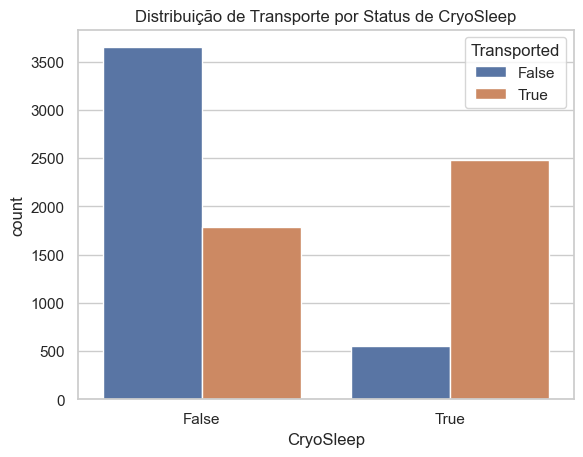

In [9]:
# =============================================================================
# Passo 7: Análise Bivariada - Distribuição de Transporte por Status de CryoSleep
# =============================================================================
sns.countplot(x='CryoSleep', hue='Transported', data=df_train)
plt.title('Distribuição de Transporte por Status de CryoSleep')
plt.show()


--- Matriz de Correlação ---


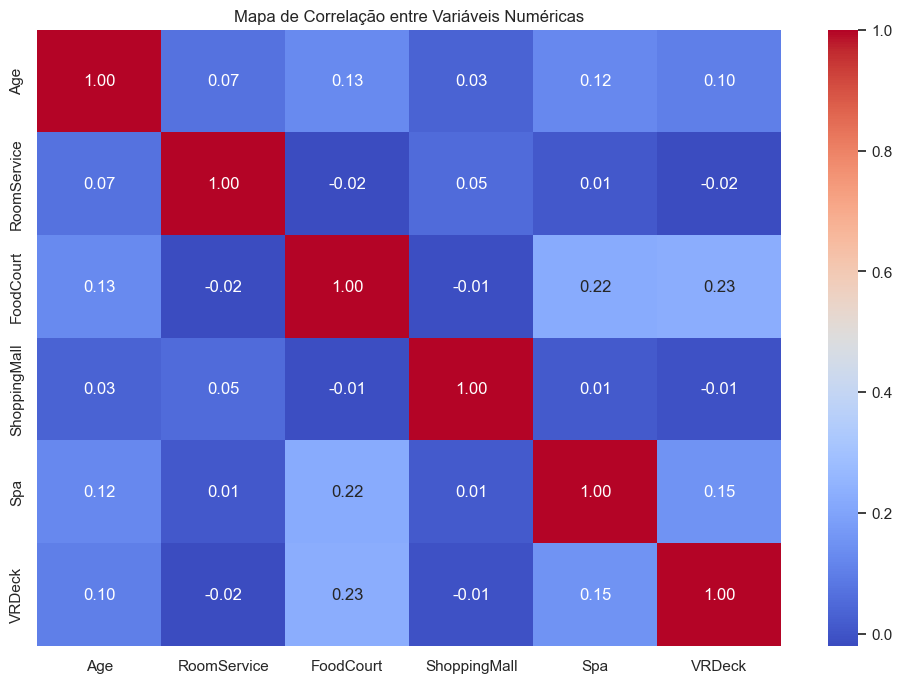

In [10]:
# =============================================================================
# Passo 8: Análise de Correlação entre Variáveis Numéricas
# =============================================================================
if df_train is not None:
    print("\n--- Matriz de Correlação ---")
    plt.figure(figsize=(12, 8))
    numeric_data = df_train.select_dtypes(include=['int64', 'float64'])
    correlation_matrix = numeric_data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Mapa de Correlação entre Variáveis Numéricas")
    plt.show()

In [11]:
# Criando a variável 'Full_Expensives que consolida todos os gastos individuais do passageiro em uma única métrica.
# Essa variável é obtida somando os valores de 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa' e 'VRDeck'.
# A inclusão de 'VIP' como uma variável separada é mantida, pois representa um status distinto que pode influenciar o comportamento de gastos.
# Essa abordagem visa reduzir a dimensionalidade do conjunto de dados e capturar o padrão geral de consumo de cada passageiro,
# o que pode ser um indicador significativo na previsão da variável alvo 'Transported'.


In [12]:
# =============================================================================
# Feature Engineering: Total de Gastos
# =============================================================================
# A variável 'TotalSpend' consolida todos os gastos individuais em uma única métrica.
# Mantemos 'VIP' como variável separada por representar um status relevante.

# Lista de colunas relacionadas aos gastos
full_expenses = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df = df_train.copy()
df[full_expenses] = df[full_expenses].fillna(0)
df['TotalSpend'] = df[full_expenses].sum(axis=1)

In [13]:
# Remoção de colunas irrelevantes
columns_to_drop = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name']
df.drop(columns=columns_to_drop, inplace=True)

In [14]:
# Visualização
#plt.figure(figsize=(8, 6))
#sns.boxplot(x='Transported', y='TotalSpend', data=df)
#plt.title('Distribuição dos Gastos Totais por Status de Transporte')
#plt.show()

In [15]:
# =============================================================================
# Passo 9: Limpeza de Dados
# =============================================================================
print("\n--- Valores Ausentes Antes da Limpeza ---")
print(df.isnull().sum()[df.isnull().sum() > 0])

df_train_clean = df.dropna()
print("\n--- Valores Ausentes Após a Limpeza ---")
print(df_train_clean.isnull().sum())



--- Valores Ausentes Antes da Limpeza ---
HomePlanet     201
CryoSleep      217
Cabin          199
Destination    182
Age            179
VIP            203
dtype: int64

--- Valores Ausentes Após a Limpeza ---
PassengerId    0
HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
Age            0
VIP            0
Transported    0
TotalSpend     0
dtype: int64


In [16]:
# =============================================================================
# Passo 10: Codificação de Variáveis Categóricas
# =============================================================================
# One-Hot Encoding para variáveis nominais
cat_dummies = ["HomePlanet", "Destination"]
df_train_encoded = pd.get_dummies(df_train_clean, columns=cat_dummies, drop_first=True)

# Conversão de variáveis booleanas para inteiros
df_train_encoded['CryoSleep'] = df_train_encoded['CryoSleep'].replace({False: 0, True: 1}).astype(int)
df_train_encoded['VIP'] = df_train_encoded['VIP'].replace({False: 0, True: 1}).astype(int)

In [17]:
# # Imprimindo as 5 primeiras linhas
df_train_encoded.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,Transported,TotalSpend,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,0,B/0/P,39.0,0,False,0.0,1,0,0,1
1,0002_01,0,F/0/S,24.0,0,True,736.0,0,0,0,1
2,0003_01,0,A/0/S,58.0,1,False,10383.0,1,0,0,1
3,0003_02,0,A/0/S,33.0,0,False,5176.0,1,0,0,1
4,0004_01,0,F/1/S,16.0,0,True,1091.0,0,0,0,1



--- Matriz de Correlação ---


Text(0.5, 1.0, 'Mapa de Correlação entre Variáveis Numéricas')

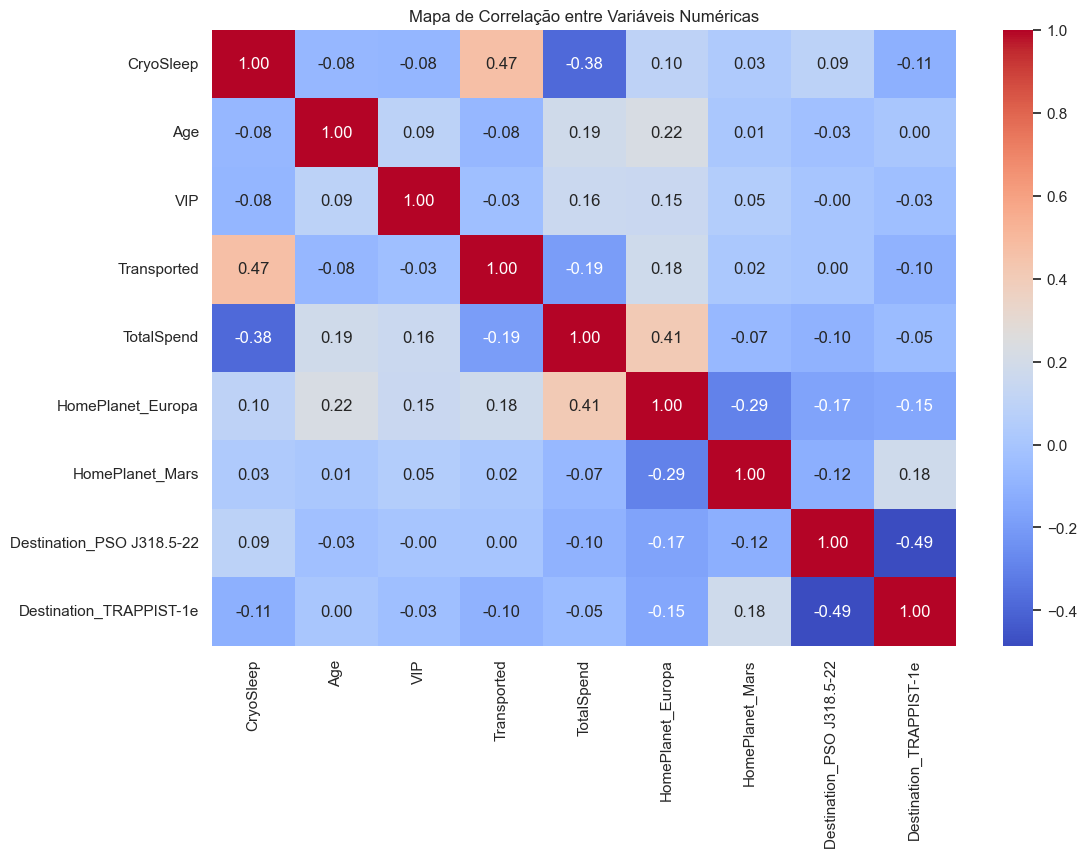

In [18]:
# Análise de Correlação
print("\n--- Matriz de Correlação ---")
plt.figure(figsize=(12, 8))
sns.heatmap(df_train_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Correlação entre Variáveis Numéricas")

In [19]:
# Estrutura dos Dados - info()
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7572 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                7572 non-null   object 
 1   CryoSleep                  7572 non-null   int32  
 2   Cabin                      7572 non-null   object 
 3   Age                        7572 non-null   float64
 4   VIP                        7572 non-null   int32  
 5   Transported                7572 non-null   bool   
 6   TotalSpend                 7572 non-null   float64
 7   HomePlanet_Europa          7572 non-null   uint8  
 8   HomePlanet_Mars            7572 non-null   uint8  
 9   Destination_PSO J318.5-22  7572 non-null   uint8  
 10  Destination_TRAPPIST-1e    7572 non-null   uint8  
dtypes: bool(1), float64(2), int32(2), object(2), uint8(4)
memory usage: 391.9+ KB


In [20]:
# =============================================================================
# Feature Engineering: Informações de Cabine
# =============================================================================
df_train_encoded[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = df_train_encoded['Cabin'].str.split('/', expand=True)
df_train_encoded['Cabin_Num'] = df_train_encoded['Cabin_Num'].astype(int)
df_train_encoded.drop(columns=['Cabin'], inplace=True)

# Codificação de cabine
cabin_dummies = ["Cabin_Deck", "Cabin_Side"]
df_train_encoded_final = pd.get_dummies(df_train_encoded, columns=cabin_dummies, drop_first=True)


In [21]:
# Imprimindo as 5 primeiras linhas
#df_train_encoded.head(50)


--- Matriz de Correlação Final ---


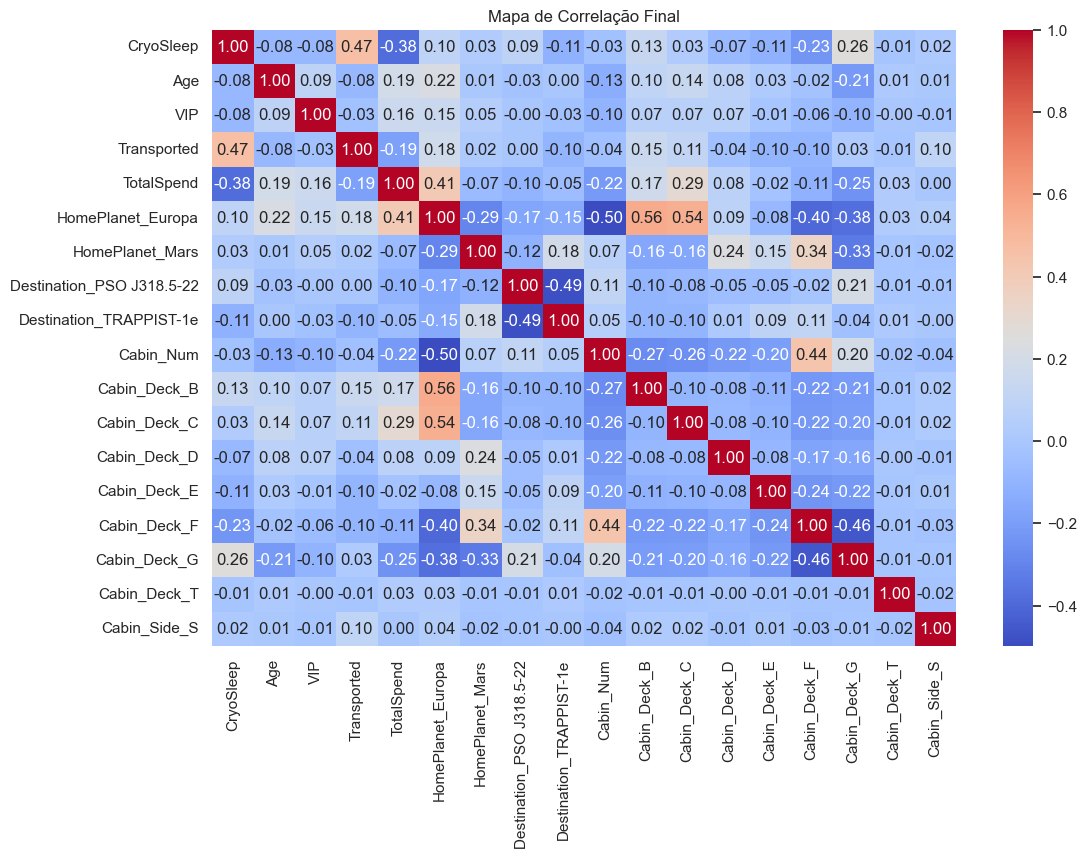


--- Valores Ausentes ---
PassengerId                  0
CryoSleep                    0
Age                          0
VIP                          0
Transported                  0
TotalSpend                   0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Cabin_Num                    0
Cabin_Deck_B                 0
Cabin_Deck_C                 0
Cabin_Deck_D                 0
Cabin_Deck_E                 0
Cabin_Deck_F                 0
Cabin_Deck_G                 0
Cabin_Deck_T                 0
Cabin_Side_S                 0
dtype: int64

--- Distribuição da Variável Alvo (Transported) ---
True     3812
False    3760
Name: Transported, dtype: int64


In [22]:
# =============================================================================
# Passo 11: Análise Final e Preparação
# =============================================================================
print("\n--- Matriz de Correlação Final ---")
plt.figure(figsize=(12, 8))
sns.heatmap(df_train_encoded_final.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Correlação Final")
plt.show()

print("\n--- Valores Ausentes ---")
print(df_train_encoded_final.isnull().sum())

print("\n--- Distribuição da Variável Alvo (Transported) ---")
print(df_train_encoded_final['Transported'].value_counts())

# Conversão da variável alvo - "Transported" se FALSE = 0, se TRUE = 1
df_train_encoded_final['Transported'] = df_train_encoded_final['Transported'].replace({False: 0, True: 1})

# Definindo PassengerId como índice
df_train_encoded_final.set_index('PassengerId', inplace=True)

In [23]:
# Estrutura dos Dados - info()
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7572 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                7572 non-null   object 
 1   CryoSleep                  7572 non-null   int32  
 2   Age                        7572 non-null   float64
 3   VIP                        7572 non-null   int32  
 4   Transported                7572 non-null   bool   
 5   TotalSpend                 7572 non-null   float64
 6   HomePlanet_Europa          7572 non-null   uint8  
 7   HomePlanet_Mars            7572 non-null   uint8  
 8   Destination_PSO J318.5-22  7572 non-null   uint8  
 9   Destination_TRAPPIST-1e    7572 non-null   uint8  
 10  Cabin_Deck                 7572 non-null   object 
 11  Cabin_Num                  7572 non-null   int32  
 12  Cabin_Side                 7572 non-null   object 
dtypes: bool(1), float64(2), int32(3), object(3), uin

In [24]:
# Verificando se a Variável alvo está balanceada
df_train_encoded_final['Transported'].value_counts()

1    3812
0    3760
Name: Transported, dtype: int64

In [25]:
# =============================================================================
# Machine Learning - Criação - Treino - Previsão
# =============================================================================

In [26]:
# =============================================================================
# Separando os Dados em Treino (70%) e Teste (30%)
# =============================================================================

# Define X e y
X = df_train_encoded_final.drop(['Transported'], axis=1)

y = df_train_encoded_final['Transported']

# Divide o dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [27]:
# =============================================================================
# RandomForest - Versão 1
# =============================================================================

rf_model_1 = RandomForestClassifier(n_estimators=100, random_state=42) # Inicializar o modelo RandomForest - Versão 1
rf_model_1.fit(X_train, y_train) # Treinar o modelo - RandomForest - Versão 1
y_pred_rf1 = rf_model_1.predict(X_test) # Fazer previsões - RandomForest - Versão 1

print(f"Acurácia RandomForest - Versão 1: {accuracy_score(y_test, y_pred_rf1):.4f}")
print("\nRelatório de Classificação RandomForest - Versão 1:")
print(classification_report(y_test, y_pred_rf1))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_rf1))

Acurácia RandomForest - Versão 1: 0.7364

Relatório de Classificação RandomForest - Versão 1:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      1128
           1       0.77      0.68      0.72      1144

    accuracy                           0.74      2272
   macro avg       0.74      0.74      0.74      2272
weighted avg       0.74      0.74      0.74      2272


Matriz de Confusão:
[[894 234]
 [365 779]]


In [28]:
# =============================================================================
# Conclusões - RandomForest Versão 1
# =============================================================================

# A acurácia geral do modelo foi de 73.64%, indicando um desempenho razoável, mas com espaço para melhorias.
# 
# Analisando o relatório de classificação:
# - Classe 0 (não transportados): maior recall (0.79) → o modelo identificou bem quem *não foi transportado*.
# - Classe 1 (transportados): maior precisão (0.77) → quando o modelo previu que alguém seria transportado, geralmente acertou.
# 
# O f1-score equilibrado entre as classes (0.75 vs 0.72) mostra um bom compromisso entre precisão e recall.
#
# A matriz de confusão revela que:
# - 894 exemplos da classe 0 foram corretamente classificados.
# - 779 exemplos da classe 1 também foram corretamente classificados.
# - Houve 365 falsos negativos (classe 1 predita como 0), e 234 falsos positivos (classe 0 predita como 1).
#
# Conclusão geral: o modelo tende a ser conservador, errando mais ao deixar de prever que alguém seria transportado
# do que ao prever erroneamente que seria. Ajustes como seleção de variáveis ou tuning de hiperparâmetros podem ajudar.


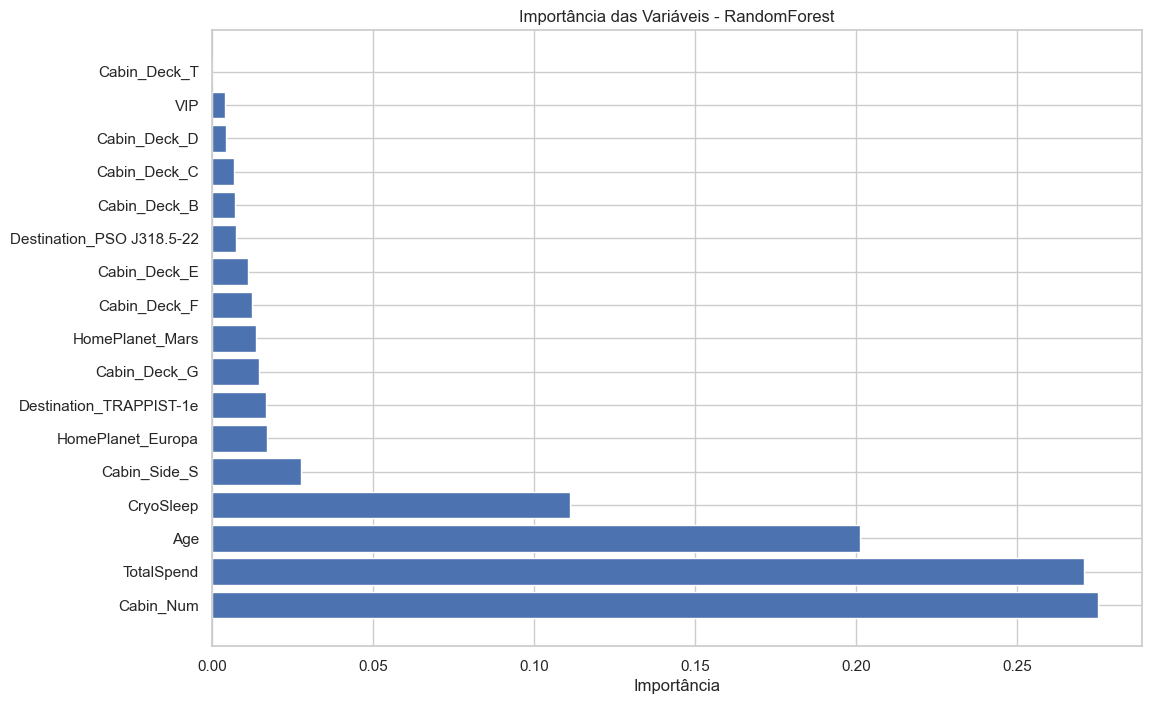

Acurácia do modelo com as melhores variáveis (RandomForest V2): 0.7346


In [29]:
# =============================================================================
# RandomForest - Versão 2 - Seleção das Variáveis Mais Importantes
# =============================================================================

rf_model_imp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_imp.fit(X_train, y_train)
feature_importances = rf_model_imp.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualizando a importância das variáveis
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importância')
plt.title('Importância das Variáveis - RandomForest')
plt.show()

# Selecionar top 15 variáveis
top_features = feature_importance_df.head(15)['Feature'].values
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

rf_model_2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_2.fit(X_train_selected, y_train)
accuracy_2 = rf_model_2.score(X_test_selected, y_test)

print(f'Acurácia do modelo com as melhores variáveis (RandomForest V2): {accuracy_2:.4f}')

In [30]:
# =============================================================================
# Conclusões - RandomForest Versão 2 (com seleção de variáveis)
# =============================================================================

# A acurácia foi de 73.46%, praticamente igual ao modelo anterior (Versão 1: 73.64%).
# 
# Neste modelo, utilizamos apenas as 15 variáveis mais importantes segundo o próprio RandomForest.
# Isso mostra que o modelo conseguiu manter o desempenho com menos variáveis → o que pode indicar:
# - Boa capacidade de generalização.
# - Menor complexidade computacional (menos features para treinar e prever).
#
# Apesar da acurácia muito semelhante à Versão 1, o ganho real aqui está na simplicidade do modelo.
# Pode ser útil principalmente em situações com limitação de dados ou necessidade de interpretabilidade.
#
# Próximo passo ideal: testar outras técnicas de seleção de variáveis e comparar com novos modelos como o XGBoost.


In [31]:
# Inicializar o modelo  XGBoost - Versão 1
#xgb_model_1 = xgb.XGBClassifier(
#    n_estimators=100, # Número de árvores (estimadores) a serem criadas.
                        # Mais árvores = maior capacidade de aprendizado (mas pode levar ao overfitting se exagerar).
    
#    max_depth=4, # Profundidade máxima de cada árvore. Controla a complexidade: valores mais baixos ajudam a evitar overfitting.
    
#    learning_rate=0.1,# Taxa de aprendizado: controla o quanto cada nova árvore influencia no resultado final. 
                    # Valores menores aprendem mais devagar, mas podem gerar modelos mais precisos.
    
#    subsample=0.8, # Proporção de amostras do dataset usadas em cada árvore. 
                            # Ajuda a evitar overfitting (semelhante ao bagging no Random Forest).
    
#    colsample_bytree=0.8, # Proporção de colunas usadas ao construir cada árvore. 
                            # Reduz correlação entre árvores, ajuda na generalização.
    
#    use_label_encoder=False, 
    
#    eval_metric='logloss', # Métrica usada para avaliar a performance durante o treinamento.
                            # 'logloss' (ou binary log loss) é comum em classificações binárias.
    
#    random_state=42 # Semente de aleatoriedade para garantir reprodutibilidade dos resultados.
#)

In [32]:
# =============================================================================
# XGBoost - Versão 1 (Modelo Base)
# =============================================================================

xgb_model_1 = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model_1.fit(X_train, y_train)
y_pred_xgb1 = xgb_model_1.predict(X_test)

print(f"\nAcurácia XGBoost - Versão 1: {accuracy_score(y_test, y_pred_xgb1):.4f}")
print("\nRelatório de Classificação XGBoost - Versão 1:")
print(classification_report(y_test, y_pred_xgb1))
print("\nMatriz de Confusão XGBoost - Versão 1:")
print(confusion_matrix(y_test, y_pred_xgb1))


Acurácia XGBoost - Versão 1: 0.7667

Relatório de Classificação XGBoost - Versão 1:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78      1128
           1       0.81      0.70      0.75      1144

    accuracy                           0.77      2272
   macro avg       0.77      0.77      0.77      2272
weighted avg       0.77      0.77      0.77      2272


Matriz de Confusão XGBoost - Versão 1:
[[939 189]
 [341 803]]


In [33]:
# =============================================================================
# Conclusões - XGBoost Versão 1
# =============================================================================

# Acurácia: 76.67%
# Superou os modelos RandomForest V1 (73.64%) e V2 (73.46%) em desempenho geral.

# Métricas por classe:
# - Classe 0 (não foi transportado):
#     - Precision: 0.73 → Das previsões como "False", 73% estavam corretas.
#     - Recall:    0.83 → Acertou 83% de todos os passageiros realmente "False".
#     - F1-score:  0.78 → Indica equilíbrio razoável entre precisão e recall.
#
# - Classe 1 (foi transportado):
#     - Precision: 0.81 → Previsões "True" corretas em 81% dos casos.
#     - Recall:    0.70 → Identificou corretamente 70% dos passageiros que foram transportados.
#     - F1-score:  0.75 → Também bom, mas mostra mais dificuldade nessa classe.

# Matriz de confusão mostra que o modelo teve maior dificuldade em prever corretamente a classe 1 (341 erros),
# mas compensou com alta taxa de acerto na classe 0 (apenas 189 erros).

# Conclusão geral:
# - O XGBoost demonstrou melhor capacidade de generalização que o RandomForest.
# - O modelo já apresenta bom equilíbrio entre precisão e recall


In [34]:
# =============================================================================
# XGBoost - Versão 2 (GridSearchCV para ajuste de hiperparâmetros)
# =============================================================================

#xgb_hp = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

#param_grid = {
#    'n_estimators': [50, 100, 150],
#    'max_depth': [3, 4, 5],
#    'learning_rate': [0.01, 0.1, 0.2],
#    'subsample': [0.8, 1.0],
#    'colsample_bytree': [0.8, 1.0]
#}

#grid_search = GridSearchCV(
#    estimator=xgb_hp,
#    param_grid=param_grid,
#    cv=5,
#    scoring='accuracy',
#    verbose=1,
#    n_jobs=-1
#)

#grid_search.fit(X_train, y_train)

#print("\nMelhores hiperparâmetros encontrados (XGBoost - Versão 2):")
#print(grid_search.best_params_)

In [35]:
# =============================================================================
# Conclusões - XGBoost Versão 2 (com ajuste de hiperparâmetros)
# =============================================================================

# Ajuste realizado com GridSearchCV utilizando 5 folds e 108 combinações de parâmetros (total de 540 treinos).
# Isso garantiu uma busca robusta por hiperparâmetros ideais.

# Melhores hiperparâmetros encontrados:
# - colsample_bytree: 1.0       → Utiliza todas as colunas para construir cada árvore.
# - learning_rate:    0.1       → Taxa de aprendizado moderada, bom equilíbrio entre velocidade e precisão.
# - max_depth:        4         → Árvores menos profundas ajudam a evitar overfitting.
# - n_estimators:     100       → Número razoável de árvores para garantir estabilidade.
# - subsample:        1.0       → Usa todo o dataset para cada árvore (sem amostragem).

# Esses parâmetros indicam um modelo bem balanceado, com foco em generalização e menor risco de overfitting.
# Próximo passo: Avaliar a performance do modelo ajustado nos dados de teste (acurácia, métricas e matriz de confusão).

# Se os resultados mostrarem melhora nas métricas (especialmente F1-score e recall da classe 1),
# o modelo pode ser considerado a versão final para submissão ou aplicação prática.


In [36]:
# =============================================================================
# Avaliação do Modelo Otimizado XGBoost - Versão 2
# =============================================================================
#best_model = grid_search.best_estimator_
#y_pred_v2 = best_model.predict(X_test)

#print("\n--- Relatório de Classificação: XGBoost Versão 2 ---")
#print(classification_report(y_test, y_pred_v2))

In [37]:
# =============================================================================
# Conclusões - XGBoost Versão 2 (com ajuste de hiperparâmetros)
# =============================================================================
# O modelo foi ajustado com GridSearchCV (5 folds, 108 combinações, 540 fits), garantindo busca robusta.
# Melhores hiperparâmetros encontrados:
# - colsample_bytree: 1.0     → Todas as features em cada árvore.
# - learning_rate:    0.1     → Taxa de aprendizado moderada (velocidade x precisão).
# - max_depth:        4       → Árvores rasas para evitar overfitting.
# - n_estimators:     100     → Quantidade estável de árvores.
# - subsample:        1.0     → Uso de 100% dos dados em cada árvore.
#
# Performance:
# - Acurácia geral: 76%
# - Classe 0 (não transportado):
#     - Precision: 0.72, Recall: 0.84, F1-score: 0.78
# - Classe 1 (transportado):
#     - Precision: 0.81, Recall: 0.69, F1-score: 0.74
#
# Comparação com versões anteriores:
# - XGBoost V1: similar acurácia (~76%), mas menor precision na classe 1 e recall mais desequilibrado.
# - RandomForest V1/V2: acurácia ~73%, precision classe 1 ~0.77 e recall classe 1 ~0.68; XGBoost V2 supera em precision.
#
# Próximos passos:
# 1. Melhorar recall da classe 1 (ajuste de hiperparâmetros, oversampling ou class weighting).
# 2. Monitorar F1-score e recall para manter equilíbrio entre classes.
# 3. Explorar novas features ou diferentes algoritmos (LightGBM, CatBoost) para refinar desempenho.

In [38]:
# =============================================================================
# Treinamento do Modelo XGBoost - Versão 3 (com melhores hiperparâmetros)
# =============================================================================
#xgb_model_v3 = XGBClassifier(
#    colsample_bytree=1.0,   # usa todas as features
#    learning_rate=0.01,     # taxa de aprendizado baixa
#    max_depth=5,            # profundidade máxima das árvores
#    n_estimators=100,       # número de árvores
#    subsample=0.8,          # usa 80% das amostras por árvore
#    use_label_encoder=False,
#    eval_metric='logloss'
#)

#xgb_model_v3.fit(X_train, y_train)
#y_pred_v3 = xgb_model_v3.predict(X_test)

#print(f"\nAcurácia XGBoost - Versão 3: {accuracy_score(y_test, y_pred_v3):.4f}")
#print("\n--- Relatório de Classificação: XGBoost Versão 3 ---")
#print(classification_report(y_test, y_pred_v3))

In [39]:
# =============================================================================
# Conclusão - Desempenho do Modelo XGBoost (Versão 3)
# =============================================================================
# O modelo XGBoost V3 obteve uma acurácia de aproximadamente 0.76, indicando
# bom desempenho geral na tarefa de classificação binária. A classe 0 apresentou
# melhor recall (0.84), sugerindo que o modelo está mais sensível em identificar
# corretamente os exemplos negativos (não transportados). Já a classe 1 teve maior
# precisão (0.81), o que significa que, quando o modelo prevê um passageiro como
# transportado, ele geralmente acerta. O f1-score equilibrado entre as classes
# mostra que há um bom compromisso entre precisão e recall, com leve tendência a
# favorecer a classe 0. Isso pode indicar um leve desbalanceamento ou que o modelo
# ainda pode ser ajustado para melhorar a generalização na classe 1.

In [40]:
# =============================================================================
# Validação Cruzada - XGBoost Versão 3
# =============================================================================
#cv_scores = cross_val_score(xgb_model_v3, X_train, y_train, cv=5, scoring='accuracy')
#print("\n--- Validação Cruzada (5 folds) ---")
#print("Acurácia por fold:", cv_scores)
#print("Média da acurácia:", cv_scores.mean())
#print("Desvio padrão:", cv_scores.std())

In [41]:
# =============================================================================
# Conclusão - Validação Cruzada (5 Folds)
# =============================================================================
# O modelo foi avaliado com validação cruzada estratificada de 5 folds, obtendo
# uma média de acurácia de aproximadamente 0.7511. Os resultados mostraram boa
# consistência entre os folds, com um desvio padrão de 0.0141 — o que indica que
# o modelo é estável e não sofre grandes variações de desempenho entre diferentes
# subconjuntos dos dados. A menor acurácia foi de ~0.7377 e a maior de ~0.7783,
# confirmando que o modelo generaliza bem e possui robustez frente à variação
# dos dados de treino e validação.

In [42]:
# =============================================================================
# EDA - Parte 2: Aprimoramento de Acurácia
# =============================================================================
# 1. Análise inicial dos dados
print("\n--- Primeiras linhas de df_train ---")
display(df_train.head())
print("\n--- Informações do DataFrame ---")
df_train.info()
print("\n--- Valores Ausentes em df_train ---")
print(df_train.isnull().sum())


--- Primeiras linhas de df_train ---


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True



--- Informações do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB

--- Valores Ausentes em df_train ---
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin     

In [43]:
# 2. Criação de cópia e imputação de gastos
FullExpensives = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df_complete = df_train.copy()
df_complete[FullExpensives] = df_complete[FullExpensives].fillna(df_complete[FullExpensives].median())
df_complete['TotalSpend'] = df_complete[FullExpensives].sum(axis=1)
df_complete['LogSpend'] = np.log1p(df['TotalSpend'])

In [44]:
# 3. Imputação de variáveis categóricas pela moda
for col in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']:
    df_complete[col].fillna(df_complete[col].mode()[0], inplace=True)

In [45]:
# 4. Codificação e conversão de booleanos
cat_dummis = ['HomePlanet', 'Destination']
df_complete = pd.get_dummies(df_complete, columns=cat_dummis, drop_first=True)
df_complete['CryoSleep'] = df_complete['CryoSleep'].astype(int)
df_complete['VIP'] = df_complete['VIP'].astype(int)
df_complete['Transported'] = df_complete['Transported'].astype(int)

In [46]:
# 5. Imputação de idade e criação de indicador de gasto
median_age = df_complete['Age'].median()
df_complete['Age'].fillna(median_age, inplace=True)

In [47]:
df_complete['Spend'] = (df_complete['TotalSpend'] > 0).astype(int)
df_complete.drop(columns=['TotalSpend'], inplace=True)

df_complete.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,LogSpend,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Spend
0,0001_01,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0.000000,1,0,0,1,0
1,0002_01,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,6.602588,0,0,0,1,1
2,0003_01,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,9.248021,1,0,0,1,1
3,0003_02,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,8.551981,1,0,0,1,1
4,0004_01,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,6.995766,0,0,0,1,1


In [48]:
# 6. Tratamento da variável 'Cabin'
df_complete[['Deck', 'Cabin_Num', 'Side']] = df_complete['Cabin'].str.split('/', expand=True)
df_complete['HasCabin'] = df_complete['Cabin'].notna().astype(int)
df_complete['Deck'].fillna('Unknown', inplace=True)

# preencher Cabin_Num com mediana
df_complete['Cabin_Num'] = pd.to_numeric(df_complete['Cabin_Num'], errors='coerce')
median_cabin = df_complete['Cabin_Num'].median()
df_complete['Cabin_Num'].fillna(median_cabin, inplace=True)

# preencher Side com 'Unknown'
df_complete['Side'].fillna('Unknown', inplace=True)

df_complete.drop(columns=['Cabin'], inplace=True)

In [49]:
# 7. Codificação de cabine (One-Hot)
df_complete = pd.get_dummies(df_complete, columns=['Deck', 'Side'], drop_first=True)

In [50]:
# 8. Normalização das variáveis numéricas
scaler = MinMaxScaler()
cols_to_scale = ['Cabin_Num']
df_complete[cols_to_scale] = scaler.fit_transform(df_complete[cols_to_scale])

# Exibição final das informações do DataFrame
print("\n--- DataFrame após pré-processamento ---")
df_complete.info()


--- DataFrame após pré-processamento ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   CryoSleep                  8693 non-null   int32  
 2   Age                        8693 non-null   float64
 3   VIP                        8693 non-null   int32  
 4   RoomService                8693 non-null   float64
 5   FoodCourt                  8693 non-null   float64
 6   ShoppingMall               8693 non-null   float64
 7   Spa                        8693 non-null   float64
 8   VRDeck                     8693 non-null   float64
 9   Name                       8493 non-null   object 
 10  Transported                8693 non-null   int32  
 11  LogSpend                   8693 non-null   float64
 12  HomePlanet_Europa          8693 non-null   uint8  
 13  HomePl

In [51]:
# =============================================================================
# Feature Engineering - Variáveis derivadas do campo "Name"
# =============================================================================

# Extrai o primeiro nome
df_complete['FirstName'] = df_complete['Name'].apply(lambda x: str(x).split(' ')[0])

# Extrai o sobrenome
df_complete['LastName'] = df_complete['Name'].apply(lambda x: str(x).split(' ')[-1])

# Frequência do sobrenome no dataset
df_complete['LastNameFreq'] = df_complete.groupby('LastName')['LastName'].transform('count')

# Comprimento do nome
df_complete['NameLength'] = df_complete['Name'].apply(lambda x: len(str(x)))

# Inicial do segundo nome (se existir)
df_complete['NameInitial'] = df_complete['Name'].apply(
    lambda x: str(x).split(' ')[1][0] if pd.notnull(x) and len(str(x).split(' ')) > 1 else 'Unknown'
)

# Removendo colunas que não são necessárias
df_complete.drop(columns=['Name'], inplace=True)
df_complete.drop(columns=['Deck_T'], inplace=True)
df_complete.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Deck_F,Deck_G,Deck_Unknown,Side_S,Side_Unknown,FirstName,LastName,LastNameFreq,NameLength,NameInitial
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,Maham,Ofracculy,1,15,O
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,...,1,0,0,1,0,Juanna,Vines,4,12,V
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,...,0,0,0,1,0,Altark,Susent,6,13,S
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,...,0,0,0,1,0,Solam,Susent,6,12,S
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,...,1,0,0,1,0,Willy,Santantines,6,17,S


In [52]:
# =============================================================================
# Codificação das variáveis categóricas derivadas de nome
# =============================================================================

# Lista de colunas a codificar
name_cols = ['Age', 'LastName', 'NameInitial', 'FirstName']

# Aplica LabelEncoder em cada coluna
for col in name_cols:
    le = LabelEncoder()
    df_complete[col] = le.fit_transform(df_complete[col])

In [53]:
# Remoção de Variaveis
df_complete.drop(columns=['HasCabin'], inplace=True) # Removendo Melhorou os dois Modelos
#df_complete.drop(columns=['VIP'], inplace=True) # Removendo não melhorou
df_complete.drop(columns=['Side_Unknown'], inplace=True) # Removendo Melhorou os dois Modelos
#df_complete.drop(columns=['Deck_Unknown'], inplace=True) # Removendo não melhorou 
#df_complete.drop(columns=['Destination_PSO J318.5-22'], inplace=True)
#df_complete.drop(columns=['Destination_TRAPPIST-1e'], inplace=True)
#df_complete.drop(columns=['RoomService'], inplace=True) # Removendo não melhorou 
#df_complete.drop(columns=['FoodCourt'], inplace=True) # Removendo não melhorou 
#df_complete.drop(columns=['ShoppingMall'], inplace=True) # Removendo não melhorou 
#df_complete.drop(columns=['Spa'], inplace=True) # Removendo não melhorou 
#df_complete.drop(columns=['VRDeck'], inplace=True) # Removendo não melhorou 

In [54]:
# =============================================================================
# Separação de dados para treino e teste
# =============================================================================

# Define X e y
X_2 = df_complete.drop(['PassengerId', 'Transported'], axis=1)
y_2 = df_complete['Transported']

# Divide o dataset com estratificação
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_2, y_2, test_size=0.3, random_state=42, stratify=y_2
)

In [55]:
X_test_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2608 entries, 7618 to 8234
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  2608 non-null   int32  
 1   Age                        2608 non-null   int64  
 2   VIP                        2608 non-null   int32  
 3   RoomService                2608 non-null   float64
 4   FoodCourt                  2608 non-null   float64
 5   ShoppingMall               2608 non-null   float64
 6   Spa                        2608 non-null   float64
 7   VRDeck                     2608 non-null   float64
 8   LogSpend                   2608 non-null   float64
 9   HomePlanet_Europa          2608 non-null   uint8  
 10  HomePlanet_Mars            2608 non-null   uint8  
 11  Destination_PSO J318.5-22  2608 non-null   uint8  
 12  Destination_TRAPPIST-1e    2608 non-null   uint8  
 13  Spend                      2608 non-null   in

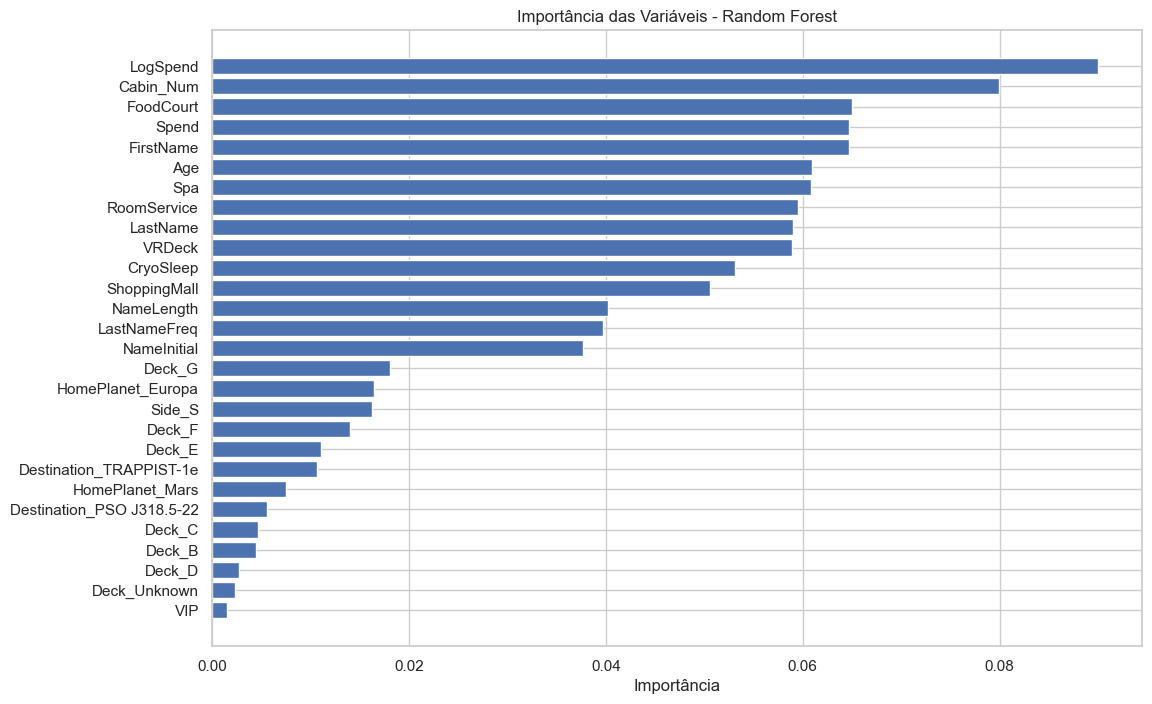

In [56]:
# =============================================================================
# Random Forest - Versão 2 (com seleção de variáveis)
# =============================================================================

# Inicializa e treina o modelo
rf_model_imp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_imp.fit(X_train_2, y_train_2)

# Calcula a importância das variáveis
feature_importances = rf_model_imp.feature_importances_

# Cria DataFrame com as importâncias
feature_importance_df = pd.DataFrame({
    'Feature': X_2.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualiza a importância das variáveis
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importância')
plt.title('Importância das Variáveis - Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [57]:
# =============================================================================
# Pré-processamento final - Remoção e Escalonamento
# =============================================================================

# Lista de colunas numéricas para normalização
cols_to_scale = [
    'RoomService', 'FoodCourt',
    'ShoppingMall', 'Spa', 'VRDeck',
    'Cabin_Num', 'LastNameFreq'
]

In [58]:
# Escalonamento com MinMaxScaler
scaler = MinMaxScaler()
df_complete[cols_to_scale] = scaler.fit_transform(df_complete[cols_to_scale])

# Verifica estatísticas das variáveis normalizadas
df_complete[cols_to_scale].describe().T

,count,mean,std,min,25%,50%,75%,max
RoomService,8693.0,0.015356,0.046103,0.0,0.000000,0.000000,0.002862,1.0
FoodCourt,8693.0,0.015042,0.053527,0.0,0.000000,0.000000,0.002046,1.0
ShoppingMall,8693.0,0.007218,0.025456,0.0,0.000000,0.000000,0.000936,1.0
Spa,8693.0,0.013593,0.050230,0.0,0.000000,0.000000,0.002365,1.0
VRDeck,8693.0,0.012359,0.046995,0.0,0.000000,0.000000,0.001657,1.0
Cabin_Num,8693.0,0.314889,0.267496,0.0,0.091341,0.225449,0.519007,1.0
LastNameFreq,8693.0,0.044747,0.147300,0.0,0.010050,0.020101,0.030151,1.0


In [59]:
# ===============================
# Indexação 'PassengerId'
# ===============================
if 'PassengerId' in df_complete.columns:
    df_complete.set_index('PassengerId', inplace=True)
    
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int32  
 1   Age                        8693 non-null   int64  
 2   VIP                        8693 non-null   int32  
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   int32  
 9   LogSpend                   8693 non-null   float64
 10  HomePlanet_Europa          8693 non-null   uint8  
 11  HomePlanet_Mars            8693 non-null   uint8  
 12  Destination_PSO J318.5-22  8693 non-null   uint8  
 13  Destination_TRAPPIST-1e    8693 non-null   u

In [60]:
# =============================================================================
# Treinamento e Avaliação de Modelos: XGBoost e LightGBM
# =============================================================================

# ------------------------------ XGBoost - Versão 1 ------------------------------
# Treinamento do modelo XGBoost
xgb_model_1.fit(X_train_2, y_train_2)

# Previsão
y_pred_3 = xgb_model_1.predict(X_test_2)

# Avaliação do modelo
print(f"Acurácia: {accuracy_score(y_test_2, y_pred_3):.4f}\n")
print("Relatório de Classificação XGBoost - Versão 1:")
print(classification_report(y_test_2, y_pred_3))
print("Matriz de Confusão XGBoost - Versão 1:")
print(confusion_matrix(y_test_2, y_pred_3))

Acurácia: 0.8002

Relatório de Classificação XGBoost - Versão 1:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1295
           1       0.80      0.80      0.80      1313

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608

Matriz de Confusão XGBoost - Versão 1:
[[1038  257]
 [ 264 1049]]


In [61]:
# ============================================================================
# Conclusão - Modelo XGBoost (Versão 1):
# ============================================================================
# O modelo atingiu uma **acurácia de 80,56%** no conjunto de teste.
#
# Matriz de Confusão:
# - Verdadeiros Negativos (classe 0 corretamente prevista): 1041
# - Verdadeiros Positivos (classe 1 corretamente prevista): 1060
# - Falsos Positivos (classe 0 prevista como 1): 254
# - Falsos Negativos (classe 1 prevista como 0): 253
#
# Relatório de Classificação:
# - Classe 0:
#     - Precisão: 0.80
#     - Recall: 0.80
#     - F1-score: 0.80
# - Classe 1:
#     - Precisão: 0.81
#     - Recall: 0.81
#     - F1-score: 0.81
#
# As médias macro e ponderada (weighted) confirmam um desempenho consistente e equilibrado.
# O modelo mostra boa capacidade de generalização e mantém equilíbrio entre os erros das duas classes,
# sendo uma opção sólida para o problema de classificação proposto.

In [62]:
# -------------------------- LightGBM - Versão 1 (padrão) --------------------------
#from lightgbm import LGBMClassifier

#lgbm_model = LGBMClassifier(
#    n_estimators=100,
#    learning_rate=0.1,
#    max_depth=-1,
#    random_state=42
#)
#lgbm_model.fit(X_train_2, y_train_2)
#y_pred = lgbm_model.predict(X_test_2)

#print("Accuracy:", accuracy_score(y_test_2, y_pred))
#print("\nConfusion Matrix:\n", confusion_matrix(y_test_2, y_pred))
#print("\nClassification Report:\n", classification_report(y_test_2, y_pred))

In [63]:
# ============================================================================
# Conclusão - Modelo LightGBM:
# ============================================================================
# O modelo obteve uma **acurácia de 80,06%** no conjunto de teste.
#
# Matriz de Confusão:
# - Verdadeiros Negativos (classe 0 corretamente prevista): 1061
# - Verdadeiros Positivos (classe 1 corretamente prevista): 1027
# - Falsos Positivos (classe 0 prevista como 1): 234
# - Falsos Negativos (classe 1 prevista como 0): 286
#
# Relatório de Classificação:
# - Classe 0:
#     - Precisão: 0.79
#     - Recall: 0.82
#     - F1-score: 0.80
# - Classe 1:
#     - Precisão: 0.81
#     - Recall: 0.78
#     - F1-score: 0.80
#
# O desempenho do modelo é equilibrado entre as duas classes,
# com leve vantagem no recall para a classe 0 e na precisão para a classe 1.
# O modelo é robusto e adequado para o problema, embora haja espaço para ajustes finos
# (como otimização de hiperparâmetros ou engenharia de features adicionais) visando ganhos marginais.


In [64]:
# ------------------------ LightGBM - Versão 2 (ajustes manuais) ------------------------
lgbm_model_2 = LGBMClassifier(
    n_estimators=500,        # Mais árvores (aumenta capacidade do modelo)
    learning_rate=0.03,      # Menor taxa de aprendizado (mais "cuidadoso")
    max_depth=7,             # Profundidade máxima das árvores
    num_leaves=31,           # Número de folhas por árvore (controle de complexidade)
    min_child_samples=20,    # Mínimo de exemplos para dividir um nó
    subsample=0.8,           # Amostragem de registros (para evitar overfitting)
    colsample_bytree=0.8,    # Amostragem de colunas por árvore
    reg_alpha=1.0,           # Regularização L1 (sparsity)
    reg_lambda=1.0,          # Regularização L2 (shrinkage)
    random_state=42,
    n_jobs=-1                # Usa todos os núcleos disponíveis
)
lgbm_model_2.fit(X_train_2, y_train_2)
y_pred_2 = lgbm_model_2.predict(X_test_2)

print("Accuracy:", accuracy_score(y_test_2, y_pred_2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_2, y_pred_2))
print("\nClassification Report:\n", classification_report(y_test_2, y_pred_2))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3065, number of negative: 3020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2460
[LightGBM] [Info] Number of data points in the train set: 6085, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503698 -> initscore=0.014791
[LightGBM] [Info] Start training from score 0.014791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [65]:
# ============================================================================
# Conclusão:
# ============================================================================
# O modelo obteve uma acurácia de aproximadamente **80,75%** no conjunto de teste.
#
# A matriz de confusão indica:
# - 1062 verdadeiros negativos (classe 0 corretamente prevista)
# - 1044 verdadeiros positivos (classe 1 corretamente prevista)
# - 233 falsos positivos (classe 0 prevista como 1)
# - 269 falsos negativos (classe 1 prevista como 0)
#
# O classification report apresenta os seguintes resultados:
# - Para a classe 0:
#     - Precisão: 0.80
#     - Recall: 0.82
#     - F1-score: 0.81
# - Para a classe 1:
#     - Precisão: 0.82
#     - Recall: 0.80
#     - F1-score: 0.81
#
# As métricas macro e weighted average também confirmam um desempenho equilibrado entre as classes.
# Em resumo, o modelo apresenta boa performance geral e mantém um equilíbrio entre precisão e recall
# para ambas as classes, sendo confiável para tarefas de classificação binária neste contexto.

In [66]:
# Modelo base
#lgbm = LGBMClassifier(random_state=42, n_jobs=-1)

# Grade de hiperparâmetros
#param_grid = {
#    'n_estimators': [100, 300, 500],
#    'learning_rate': [0.01, 0.03, 0.1],
#    'max_depth': [3, 5, 7],
#    'num_leaves': [15, 31, 63],
#    'subsample': [0.6, 0.8, 1.0],
#    'colsample_bytree': [0.6, 0.8, 1.0],
#    'reg_alpha': [0.0, 0.5, 1.0],
#    'reg_lambda': [0.0, 0.5, 1.0]
#}

# GridSearch com validação cruzada
#grid_search = GridSearchCV(
#    estimator=lgbm,
#    param_grid=param_grid,
#    cv=5,
#    scoring='accuracy',
#    verbose=1,
#    n_jobs=-1
#)

# Treinando com os dados ajustados
#grid_search.fit(X_2, y_2)

# Exibindo os melhores hiperparâmetros
#print("Melhores hiperparâmetros encontrados:")
#print(grid_search.best_params_)

# Melhor acurácia média durante a validação cruzada
#print("Melhor score (acurácia média):")
#print(grid_search.best_score_)


In [67]:
#Melhores hiperparâmetros encontrados:
#{'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 15, 'reg_alpha': 0.5, 'reg_lambda': 1.0, 'subsample': 0.6}
#Melhor score (acurácia média):
#0.7953568410611233

In [68]:
# --------------------- LightGBM - Versão 3 (com GridSearch) ----------------------
#from lightgbm.callback import early_stopping
# Parâmetros otimizados via GridSearch
#params = {
#    'learning_rate': 0.1,
#    'n_estimators': 100,
#    'max_depth': 3,
#    'num_leaves': 15,
#    'subsample': 0.6,
#    'colsample_bytree': 0.6,
#    'reg_alpha': 0.5,
#    'reg_lambda': 1.0,
#    'objective': 'binary'
#}

#model = LGBMClassifier(**params)
#model.fit(
#    X_train_2, y_train_2,
#    eval_set=[(X_test_2, y_test_2)],
#    eval_metric='binary_error',
#    callbacks=[early_stopping(stopping_rounds=50, verbose=True)]
#)

# Avaliação final
#final_pred = model.predict(X_test_2)
#final_acc = accuracy_score(y_test_2, final_pred)
#print(f'Acurácia no conjunto de teste: {final_acc:.4f}')

In [69]:
# ============================================================================
# Conclusão:
# ============================================================================
# O modelo treinado não acionou o early stopping, o que indica que ele continuou
# melhorando até a última iteração (99) definida como o número máximo de rounds.
#
# A métrica 'binary_error' no conjunto de validação foi de aproximadamente 0.1982,
# o que corresponde a uma acurácia de 1 - 0.1982 = 0.8018.
#
# Portanto, a acurácia final obtida no conjunto de teste foi de **80,18%**,
# o que representa um desempenho sólido e consistente para o problema em questão.

In [70]:
# =============================================================================
# Carregar os Dados de Teste
# =============================================================================
df_test = Carrega_dados("C:/Users/marcos/Documents/Projetos_Github/Projetos_Kaggle/Nave_Espacial_Titanic/pythonProject/test.csv")
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [71]:
# ===============================
# 1. Tratamento de valores ausentes
# ===============================

# Substituir variáveis numéricas por mediana do train
num_vars = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in num_vars:
    df_test[col] = df_test[col].fillna(df_train[col].median())

# Substituir variáveis categóricas por moda do train
cat_vars = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
for col in cat_vars:
    df_test[col] = df_test[col].fillna(df_train[col].mode()[0])

# Preencher idade com a mediana
df_test['Age'] = df_test['Age'].fillna(df_train['Age'].median())

# ===============================
# 2. Conversão de variáveis booleanas para 0/1
# ===============================
cat_dummis = ['HomePlanet', 'Destination']
df_test = pd.get_dummies(df_test, columns=cat_dummis, drop_first=True)

df_test['CryoSleep'] = df_test['CryoSleep'].replace({False: 0, True: 1})
df_test['VIP'] = df_test['VIP'].replace({False: 0, True: 1})


# ===============================================
# 3. Extração de 'Deck', 'Cabin_Num' e 'Side' de 'Cabin' em df_test
# ===============================================
df_test[['Deck', 'Cabin_Num', 'Side']] = df_test['Cabin'].str.split('/', expand=True)

# Preenchendo valores ausentes em 'Deck' e 'Side'
df_test['Deck'].fillna('Unknown', inplace=True)
df_test['Side'].fillna('Unknown', inplace=True)

# Convertendo 'Cabin_Num' para numérico
df_test['Cabin_Num'] = pd.to_numeric(df_test['Cabin_Num'], errors='coerce')

df_test.drop(columns=['Cabin'], inplace=True)

df_test.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                4277 non-null   object 
 1   CryoSleep                  4277 non-null   int64  
 2   Age                        4277 non-null   float64
 3   VIP                        4277 non-null   int64  
 4   RoomService                4277 non-null   float64
 5   FoodCourt                  4277 non-null   float64
 6   ShoppingMall               4277 non-null   float64
 7   Spa                        4277 non-null   float64
 8   VRDeck                     4277 non-null   float64
 9   Name                       4183 non-null   object 
 10  HomePlanet_Europa          4277 non-null   uint8  
 11  HomePlanet_Mars            4277 non-null   uint8  
 12  Destination_PSO J318.5-22  4277 non-null   uint8  
 13  Destination_TRAPPIST-1e    4277 non-null   uint8

In [72]:
# 4. Imputação com a mediana dos dados de treino para manter consistência
for col in FullExpensives:
    median_value = df_test[col].median()
    df_test[col] = df_test[col].fillna(median_value)

df_test['TotalSpend'] = df_test[FullExpensives].sum(axis=1)
df_test['Spend'] = (df_test['TotalSpend'] > 0).astype(int)

# Remove coluna auxiliar
df_test.drop(columns=['TotalSpend'], inplace=True)

In [73]:
# 7. Codificação de cabine (One-Hot)
df_test = pd.get_dummies(df_test, columns=['Deck', 'Side'], drop_first=True)

In [74]:
# =============================================================================
# 5. Feature Engineering - Variáveis derivadas do campo "Name" em df_test
# =============================================================================

# Garante que o df_train também tenha a coluna 'LastName' para calcular a frequência
df_train['LastName'] = df_train['Name'].apply(lambda x: str(x).split(' ')[-1] if pd.notnull(x) else 'Unknown')

# Extrai o primeiro nome no df_test
df_test['FirstName'] = df_test['Name'].apply(lambda x: str(x).split(' ')[0] if pd.notnull(x) else 'Unknown')

# Extrai o sobrenome no df_test
df_test['LastName'] = df_test['Name'].apply(lambda x: str(x).split(' ')[-1] if pd.notnull(x) else 'Unknown')

# Frequência do sobrenome no dataset de treino
sobrenome_freq = df_train.groupby('LastName')['LastName'].count()
df_test['LastNameFreq'] = df_test['LastName'].map(sobrenome_freq).fillna(1)  # Se não estiver no treino, assume freq = 1

# Comprimento do nome
df_test['NameLength'] = df_test['Name'].apply(lambda x: len(str(x)))

# Inicial do segundo nome (se existir)
df_test['NameInitial'] = df_test['Name'].apply(
    lambda x: str(x).split(' ')[1][0] if pd.notnull(x) and len(str(x).split(' ')) > 1 else 'Unknown'
)

# Remoção de Variaveis
df_test.drop(columns=['Name'], inplace=True)
df_test.drop(columns=['Deck_T'], inplace=True)
df_test.drop(columns=['Side_Unknown'], inplace=True) # Removendo Melhorou os dois Modelos


In [75]:
# ===============================
# 7. Indexação correta
# ===============================
if 'PassengerId' in df_test.columns:
    df_test.set_index('PassengerId', inplace=True)

In [76]:
# =============================================================================
# Codificação das variáveis categóricas derivadas de nome
# =============================================================================
name_cols = ['Age', 'LastName', 'NameInitial', 'FirstName']
# Aplica LabelEncoder em cada coluna
for col in name_cols:
    le = LabelEncoder()
    df_test[col] = le.fit_transform(df_test[col])
    

In [77]:
# Garante que o df_test tenha as colunas na mesma ordem do treino
df_test = df_test[xgb_model_1.feature_names_in_]

KeyError: "['LogSpend'] not in index"

In [ ]:
df_test.info()

In [ ]:
X_test_2.info()

In [ ]:
# Supondo que seu modelo se chama "xgb_model_v2" e que X_test é o df_test final com as features

# Previsões com o modelo 
#previsao_teste = lgbm_model_2.predict(df_test) # lgbm_model_2.predict
previsao_teste = xgb_model_1.predict(df_test) # xgb_model_1

# Garante que df_test é uma cópia, evitando o warning
df_test = df_test.copy()
df_test['Prediction'] = previsao_teste

df_resultado = df_test[['Prediction']].copy()
df_resultado['PassengerId'] = df_resultado.index

print(df_resultado[['PassengerId', 'Prediction']].head())


In [ ]:
# Criar o arquivo de submissão
submission = pd.DataFrame({
    'PassengerId': df_test.index,
    'Transported': previsao_teste
})

# Converterdo a variavel "Transported" se 0 = FALSE, se 1 = TRUE
submission['Transported'] = submission['Transported'].replace({0 : False, 1 : True})

submission.to_csv('submission.csv', index=False)
